# MAP583 - Data Camp
# Course project
# Credit Card Fraud Detection

We have chosen this dataset from Kaggle (https://www.kaggle.com/mlg-ulb/creditcardfraud/data), containing credid card transactions data, and the objective is to predict the transactions which are frauds.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline
# %matplotlib notebook
style.use('ggplot')

## Loading dataset

In [2]:
data = pd.read_csv("../data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Check if there is null data
# data.isnull().sum()

In [5]:
# data.describe()

## Removing 'Time' column and normalizing (scaling) data

In [3]:
data.drop(['Time'], axis=1, inplace=True)

In [4]:
labels = data['Class']

The following is necessary, because of the way the SVDD library is coded

In [5]:
labels_svm = labels.copy()
labels_svm[labels == 1] = -1 # fraud
labels_svm[labels == 0] = 1 # non-fraud

In [6]:
from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(data.values)
scaled_data = pd.DataFrame(scaled_features,
                           index=data.index,
                           columns=data.columns)

In [7]:
scaled_data.drop(['Class'], axis=1, inplace=True)
scaled_data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-8.157366e-16,3.154853e-17,-4.409878e-15,-6.734811e-16,-2.874435e-16,4.168992e-16,-8.767997e-16,-2.423604e-16,3.078727e-16,2.026926e-17,...,2.754870e-16,1.685077e-17,1.478472e-15,-6.797197e-16,1.234659e-16,-7.659279e-16,3.247603e-16,-2.953495e-18,5.401572e-17,3.202236e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,-2.258191e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,-4.917360e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,-8.533551e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,4.168842e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,2.180758e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


## Check target class

 1    284315
-1       492
Name: Class, dtype: int64


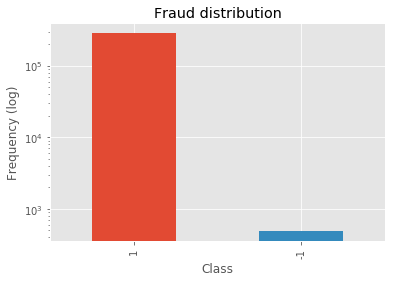

In [11]:
class_counts = labels_svm.value_counts()
print(class_counts)

# Plot a histogram
class_counts.plot(kind='bar')
plt.title("Fraud distribution")
plt.xlabel("Class")
plt.ylabel("Frequency (log)")
plt.yscale('log')

In [12]:
print('Baseline: {:.3f}%'.format(len(labels_svm[labels_svm == 1]) / len(labels_svm) * 100))

Baseline: 99.827%


The baseline accuracy is therefore 99.827%, so any model which performs below this threshold isn't doing very well

## Splitting data

In [8]:
from sklearn.model_selection import train_test_split

test_size = 0.2  # "Pareto rule", 80/20
X_train, X_test, y_train, y_test = train_test_split(scaled_data,
                                                    labels_svm,
                                                    test_size=test_size)

## We will use only non-fraud points to train SVDD
In the library we only have SVDD implemented. There is not an implementation of SVDD-neg (a version that incorporates negative examples also).

LIBSVM:

https://github.com/cjlin1/libsvm

https://github.com/cjlin1/libsvm/tree/master/python # bindings em Python

https://www.csie.ntu.edu.tw/~cjlin/libsvm/index.html

https://www.csie.ntu.edu.tw/~cjlin/papers/libsvm.pdf # article

https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf # guide

SVDD:

https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/#libsvm_for_svdd_and_finding_the_smallest_sphere_containing_all_data

One-class SVM:

http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html

Outras pessoas tiveram a mesma pergunta, mas aparentemente ninguém tem o SVDD-neg implementado
https://www.reddit.com/r/MachineLearning/comments/396o0n/experience_training_support_vector_data/

Biblioteca em MATLAB (tem a ver com o criador de SVDD)

https://www.tudelft.nl/ewi/over-de-faculteit/afdelingen/intelligent-systems/pattern-recognition-bioinformatics/pattern-recognition-laboratory/data-and-software/dd-tools/

In [9]:
non_fraud_X_train = X_train[y_train==1].values.tolist()
non_fraud_y_train = y_train[y_train==1].values.tolist()

In [10]:
from svm import *
from svmutil import *

In [11]:
problem = svm_problem(non_fraud_y_train,
                      non_fraud_X_train,
                      isKernel=False) # set to True if precomputed Kernel

In [ ]:
# {'C': 6.325283529810813e-06, 'kernel': {'coef0': 1.9690049850021658, 'gamma': 0.9417836463715797, 'type': 3}}
param = svm_parameter()
param.svm_type = 5
param.kernel_type = 3
param.degree = 2
param.gamma = 0.9417836463715797
param.C = 6.325283529810813e-06
param.coef0 = 1.9690049850021658
param.eps = 0.001
param.cross_validation = False
param.nr_fold = 0
model = svm_train(problem, param)

In [18]:
y_test = y_test.values.tolist()
X_test = X_test.values.tolist()

As we don't use the negative labels in the training set, I am adding them to our test set (maybe this is wrong to do)

In [19]:
y_test.extend(y_train[y_train==-1].values.tolist())
X_test.extend(X_train[y_train==-1].values.tolist())

In [20]:
p_label, p_acc, p_val = svm_predict(y_test, X_test, model)

Accuracy = 99.1422% (56862/57354) (classification)


In [21]:
p_acc

(99.14216968302124, 0.03431321267915054, 0.0009902167601729527)

In [22]:
val = np.array(p_val)
lab = np.array(p_label)

In [23]:
val = val.reshape(val.shape[0])
lab = lab.reshape(lab.shape[0])

In [24]:
(np.array(np.where(lab<0)).flatten() == np.array(np.where(val>0)).flatten()).all()

True

p_label : +1 para não fraude, -1 para fraude

p_val : negativo para não fraude, positivo para fraude (não sei nada sobre a magnitude de p_val ainda, mas acredito que seja a distância até a decision boundary)

## Area under the precision-recall curve

The SVDD method doesn't predict probabilities, but the output p_val is the distance of each point to the decision boundary (negative for non-frauds and positive for frauds)

Text(0.5,1,'2-class Precision-Recall curve: AP=0.015')

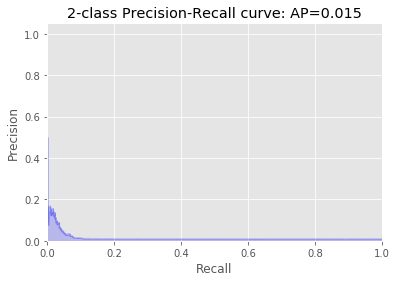

In [25]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, p_val, pos_label=-1)
average_precision = -np.sum(np.diff(recall) * np.array(precision)[:-1])

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.3f}'.format(average_precision))

In [26]:
from sklearn.metrics import auc

auc(recall, precision)

0.014140976905742609

## Optimization

In [27]:
class Objective_SVDD(object):
    """
    A class to encapsulate the SVC model and our objective function (the error in this case, to minimize)
    """
    
    def __init__(self):
        self.history_f = []
        self.fbest = np.inf
        self.history_f_best = []
        self.problem = svm_problem(non_fraud_y_train,
                                   non_fraud_X_train,
                                   isKernel=False) # set to True if precomputed Kernel
        
    def encode(self, C, gamma):
        """
        Returns a dict with the square value of the arguments C and gamma.
        """
        return {'C': C ** 2, 'gamma': gamma ** 2}
    
    def __call__(self, pair):
        params = self.encode(*pair)
        C_in = params['C']
        gamma_in = params['gamma']
        
        param = svm_parameter()
        param.svm_type = 5
        param.kernel_type = 2
        param.degree = 2
        param.gamma = gamma_in
        param.C = C_in
        param.eps = 0.001
        param.cross_validation = False
        param.nr_fold = 0
        
        model = svm_train(self.problem, param)

        p_label, p_acc, p_val = svm_predict(y_test, X_test, model)
        
        precision, recall, thresholds = precision_recall_curve(y_test, p_val, pos_label=-1)
        average_precision = -np.sum(np.diff(recall) * np.array(precision)[:-1])
        
        f = 1 - average_precision # error function
        
        self.history_f.append(f)
        if f < self.fbest:
            self.fbest = f
        self.history_f_best.append(self.fbest)
        return f

In [28]:
import cma

In [ ]:
fun_cma = Objective_SVDD()
res_cma = cma.fmin(fun_cma, np.array([0.5, 0.5]), 0.25)

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=222371, Wed Mar 14 23:47:53 2018)
Accuracy = 5.22893% (2999/57354) (classification)
Accuracy = 0.861317% (494/57354) (classification)
Accuracy = 0.871779% (500/57354) (classification)
Accuracy = 0.868292% (498/57354) (classification)
Accuracy = 0.915368% (525/57354) (classification)
Accuracy = 0.866548% (497/57354) (classification)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 4.655806334020522e-01 1.0e+00 2.30e-01  2e-01  2e-01 5:15.7
Accuracy = 96.1101% (55123/57354) (classification)
Accuracy = 99.388% (57003/57354) (classification)
Accuracy = 97.2382% (55770/57354) (classification)
Accuracy = 0.870035% (499/57354) (classification)
Accuracy = 98.8894% (56717/57354) (classification)
Accuracy = 0.868292% (498/57354) (classification)
    2     12 3.960411604462672e-01 1.3e+00 3.10e-01  2e-01  4e-01 8:26.3
Accuracy = 99.2694% (56935/57354) (classification)
Accuracy = 99.2834% (56943/57354) (cla

In [ ]:
cma.plot()

In [ ]:
print("Accuracy: {}".format(1 - res_cma[1]))
print("Optimal parameters: {}".format(fun_cma.encode(*res_cma[0])))

In [ ]:
optimized_params = fun_cma.encode(*res_cma[0])
param.C = optimized_params['C']
param.gamma = optimized_params['gamma']
model = svm_train(problem, param)

In [ ]:
p_label, p_acc, p_val = svm_predict(y_test, X_test, model)

## Save model

In [ ]:
svm_save_model('./model_1.m', model)

In [ ]:
model = svm_load_model('./model_1.m')

In [ ]:
p_label, p_acc, p_val = svm_predict(y_test, X_test, model)

In [ ]:
from sklearn.metrics import (average_precision_score,
                             accuracy_score,
                             classification_report,
                             f1_score)
average_precision = average_precision_score(y_test, p_val)
f1 = f1_score(y_test, p_label)
acc = accuracy_score(y_test, p_label)


print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print('F1 score: {0:0.2f}'.format(f1))
print('Accuracy score: {0:0.2f}'.format(acc))
print(classification_report(y_test, p_label))